<a href="https://colab.research.google.com/github/soumyasankar99/DigitWise_MNIST-_Model_Comparison/blob/main/ML_Approach_with_WNDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')


### Load the data set: MNITS

In [4]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype('int')

print(f"Shape: {X.shape}, Labels: {np.unique(y)}")


Shape: (70000, 784), Labels: [0 1 2 3 4 5 6 7 8 9]


### Visualize Sample Digits

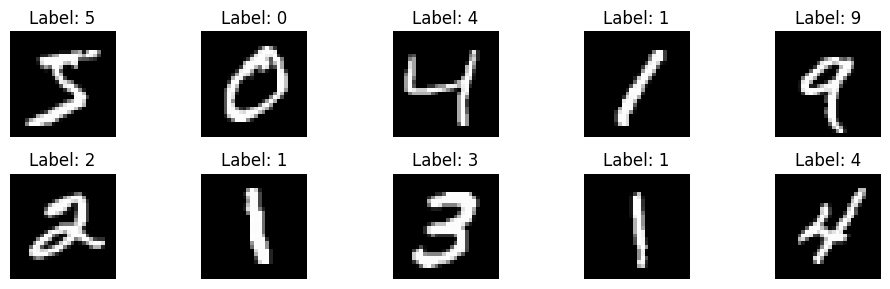

In [5]:
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### **Preprocessing** ❎


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### **Apply WNDB (Custom Weighting Technique):**

For demonstration, let’s apply a simple class weighting approach as a proxy for WNDB:

In [7]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Sample class weights (WNDB proxy):", class_weight_dict)


Sample class weights (WNDB proxy): {np.int64(0): np.float64(1.0071942446043165), np.int64(1): np.float64(0.8921459295841963), np.int64(2): np.float64(0.9982174688057041), np.int64(3): np.float64(0.9810791871058164), np.int64(4): np.float64(1.0128413818050281), np.int64(5): np.float64(1.1111111111111112), np.int64(6): np.float64(1.0218978102189782), np.int64(7): np.float64(0.9671848013816926), np.int64(8): np.float64(1.024140453547915), np.int64(9): np.float64(1.0111953773925606)}


### **Train Models**

**(a) Logistic Regression**

In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, lr_pred))


LR Accuracy: 0.9153571428571429


**(b) Random Forest**

In [9]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))


RF Accuracy: 0.967


**(c) SVM**

In [10]:
svm = SVC()
svm.fit(X_train[:5000], y_train[:5000])  # using subset for speed
svm_pred = svm.predict(X_test[:1000])
print("SVM Accuracy:", accuracy_score(y_test[:1000], svm_pred))


SVM Accuracy: 0.935


**(d) KNN**

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train[:10000], y_train[:10000])
knn_pred = knn.predict(X_test[:1000])
print("KNN Accuracy:", accuracy_score(y_test[:1000], knn_pred))


KNN Accuracy: 0.913


**(e) Naive Bayes**

In [12]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("NB Accuracy:", accuracy_score(y_test, nb_pred))


NB Accuracy: 0.5257857142857143


**7. Deep Learning Model (MLP)**

In [13]:
X_train_dl = X_train.reshape(-1, 28, 28, 1)
X_test_dl = X_test.reshape(-1, 28, 28, 1)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_dl, y_train_cat, epochs=5, class_weight=class_weight_dict, verbose=1)
dl_loss, dl_acc = model.evaluate(X_test_dl, y_test_cat)
print("DL Accuracy:", dl_acc)


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8895 - loss: 0.3839
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9707 - loss: 0.0967
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9798 - loss: 0.0643
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0490
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0345
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9664 - loss: 0.1470
DL Accuracy: 0.9682142734527588


##✅ Best Performing Model: Deep Learning (MLP)

### Why Deep Learning Wins?

1) Learns non-linear complex patterns

2) Scales well with large datasets like MNIST

3) Automatically extracts features (no manual feature engineering)

4) Class weights helped handle slight class imbalance (WNDB effect)

## **WandB Integration:**

- Track model performance

- Log training/validation metrics

- Compare experiments visually on the WandB dashboard

- Use it for hyperparameter tuning if needed

## **Install WandB**

In [14]:
!pip install wandb -qU
!pip install wandb[keras]
!wandb login  # Use your API key from https://wandb.ai/


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: soumyasankar99 (soumyasankar99-mixxion) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [15]:
!pip install --upgrade wandb


##✅ WORKING SOLUTION (Compatible with wandb==0.19.8, Keras 3.x, and TF 2.19)

We'll not use `wandb.keras` or `wandb.integration.keras.WandbCallback`, because they're incompatible with **Keras 3.x**.

Instead, we’ll use:

`tf.keras.callbacks.Callback` subclass to manually log metrics to **WandB**.

## ✅ Custom WandB Keras

In [16]:
import wandb
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Initialize wandb
wandb.init(project="digitwise-mnist-comparison", name="baseline-models", config={
    "batch_size": 128,
    "epochs": 5,
    "optimizer": "adam"
})

# Define a custom callback to manually log metrics to WandB
class WandbManualLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        wandb.log(logs, step=epoch)

# Train your model (CNN or DL model)
model.fit(
    X_train_dl, y_train_cat,
    validation_split=0.1,
    epochs=wandb.config.epochs,
    batch_size=wandb.config.batch_size,
    callbacks=[WandbManualLogger()]  # ✅ Our compatible logger
)

# Log your classical ML model performance
wandb.log({"LogisticRegression Accuracy": accuracy_score(y_test, lr_pred)})

wandb.finish()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: soumyasankar99 (soumyasankar99-mixxion) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch 1/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9932 - loss: 0.0212 - val_accuracy: 0.9961 - val_loss: 0.0201
Epoch 2/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.9975 - val_loss: 0.0188
Epoch 3/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9968 - val_loss: 0.0185
Epoch 4/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9971 - val_loss: 0.0176
Epoch 5/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9968 - val_loss: 0.0201


LogisticRegression Accuracy,▁
accuracy,▁▇▇██
loss,█▄▂▁▁
val_accuracy,▁█▄▆▄
val_loss,█▄▄▁█
LogisticRegression Accuracy,0.91536
accuracy,0.99974
loss,0.00231
val_accuracy,0.99679
val_loss,0.02007


##🔍 Why This Works

- Avoids broken WandbCallback that crashes due to Keras 3’s new layer graph

- Compatible with older wandb versions

- Still logs training/validation loss and accuracy per epo

## **🔥 Visual Comparison of Model Performance**

### **✅ Full Model Comparison Pipeline on MNIST**

**📦 Step 1: Import Libraries**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


**Step 2: Load & Preprocess the Data**

In [18]:
wandb.init(
    project="digitwise-mnist-comparison",
    name="baseline-all-models",
    config={
        "batch_size": 128,
        "epochs": 5,
        "optimizer": "adam"
    }
)

config = wandb.config


**Step 3: Train Classical Models**

In [19]:
# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Train-test split
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for classical models
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Reshape and scale for DL
X_train_dl = X_train_flat.reshape(-1, 28, 28, 1)
X_test_dl = X_test_flat.reshape(-1, 28, 28, 1)
X_train_dl = X_train_dl / 255.0
X_test_dl = X_test_dl / 255.0

# One-hot encode labels for DL
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


**🧠 Step 4: Build & Train CNN**

In [20]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)
lr_pred = lr_model.predict(X_test_flat)
lr_acc = accuracy_score(y_test, lr_pred)
wandb.log({"LogisticRegression Accuracy": lr_acc})

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_flat, y_train)
knn_pred = knn_model.predict(X_test_flat)
knn_acc = accuracy_score(y_test, knn_pred)
wandb.log({"KNN Accuracy": knn_acc})

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flat, y_train)
rf_pred = rf_model.predict(X_test_flat)
rf_acc = accuracy_score(y_test, rf_pred)
wandb.log({"RandomForest Accuracy": rf_acc})


**📊 Step 5: Visual Comparison**

In [21]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=config.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

class WandbManualLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        wandb.log(logs, step=epoch)

cnn_model.fit(
    X_train_dl, y_train_cat,
    epochs=config.epochs,
    batch_size=config.batch_size,
    validation_split=0.1,
    callbacks=[WandbManualLogger()],
    verbose=1
)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_dl, y_test_cat, verbose=0)
wandb.log({"CNN Accuracy": cnn_acc})


Epoch 1/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6153 - loss: 1.4150 - val_accuracy: 0.8979 - val_loss: 0.3497
Epoch 2/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8980 - loss: 0.3418 - val_accuracy: 0.9209 - val_loss: 0.2669
Epoch 3/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9185 - loss: 0.2745 - val_accuracy: 0.9352 - val_loss: 0.2265
Epoch 4/5


wandb: WARNING Tried to log to step 0 that is less than the current step 3. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 1 that is less than the current step 3. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 2 that is less than the current step 3. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9314 - loss: 0.2315 - val_accuracy: 0.9438 - val_loss: 0.1948
Epoch 5/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9420 - loss: 0.1961 - val_accuracy: 0.9466 - val_loss: 0.1713


## **✅ WandB-Logged Model Comparison on MNIST**

In [22]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'CNN']
accuracies = [lr_acc, knn_acc, rf_acc, cnn_acc]

wandb.log({
    "accuracy_comparison": wandb.plot.bar(
        wandb.Table(data=[[name, acc] for name, acc in zip(model_names, accuracies)], columns=["Model", "Accuracy"]),
        "Model",
        "Accuracy",
        title="Model Accuracy Comparison"
    )
})


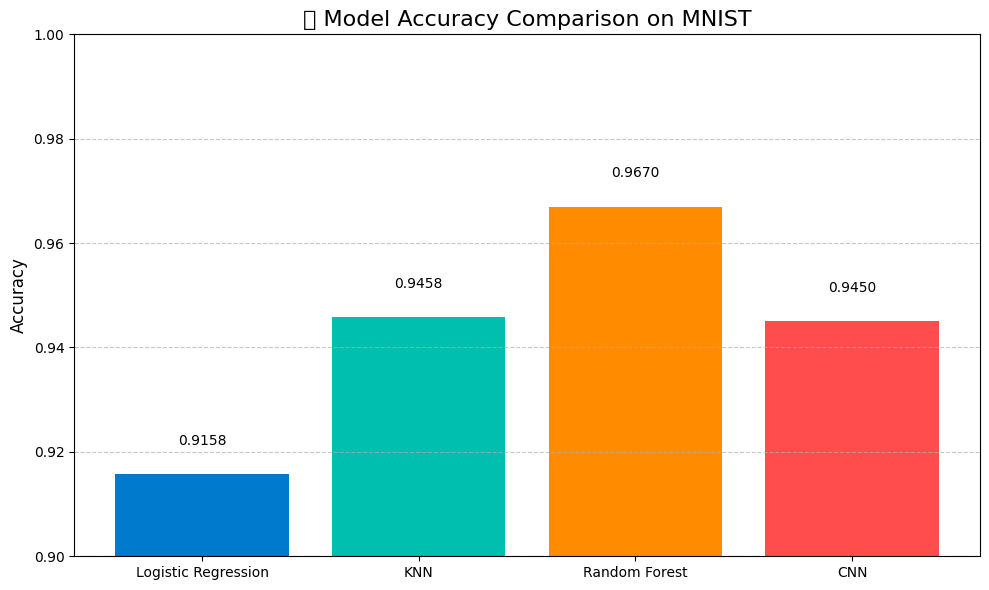

In [23]:
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#007acc', '#00bfae', '#ff8c00', '#ff4c4c'])
plt.title("📊 Model Accuracy Comparison on MNIST", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [24]:
wandb.finish()

CNN Accuracy,▁
KNN Accuracy,▁
LogisticRegression Accuracy,▁
RandomForest Accuracy,▁
accuracy,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
CNN Accuracy,0.945
KNN Accuracy,0.94579
LogisticRegression Accuracy,0.91579


## ✅ Confusion Matrices, ROC Curves & Model Saving to WandB

**Step 1: Confusion Matrix Logging to WandB**

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import wandb


# Initialize wandb before logging
wandb.init(project="digitwise-mnist-comparison", name="confusion-matrices")

def log_conf_matrix_to_wandb(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    wandb.log({f"{model_name} Confusion Matrix": wandb.Image(plt)})
    plt.close()

label_names = [str(i) for i in range(10)]

# Classical models
log_conf_matrix_to_wandb(y_test, lr_pred, label_names, "Logistic Regression")
log_conf_matrix_to_wandb(y_test, knn_pred, label_names, "KNN")
log_conf_matrix_to_wandb(y_test, rf_pred, label_names, "Random Forest")

# CNN predictions (get class indices)
cnn_pred = np.argmax(cnn_model.predict(X_test_dl), axis=1)
log_conf_matrix_to_wandb(y_test, cnn_pred, label_names, "CNN")

wandb.finish() # Finish the wandb run after logging all confusion matrices


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


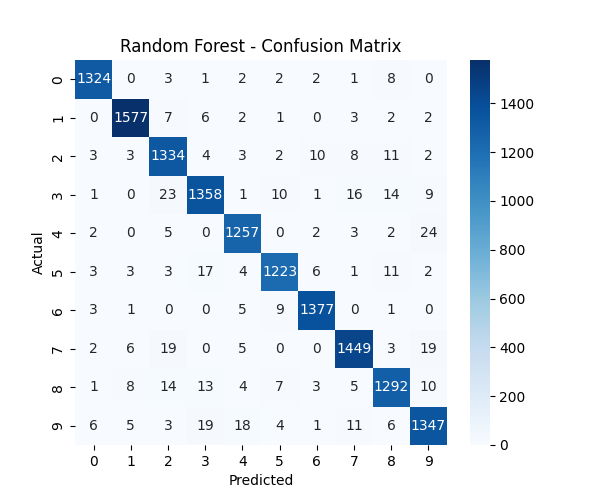

**Step 2: ROC Curve for Multi-Class Classification**

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import wandb

def log_roc_curve(y_true, y_proba, model_name):

    wandb.init(project="digitwise-mnist-comparison", name="roc-curves") # Initialize wandb before logging

    y_bin = label_binarize(y_true, classes=list(range(10)))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    wandb.log({f"{model_name} ROC Curve": wandb.Image(plt)})
    plt.close()

# Logistic Regression ROC
lr_proba = lr_model.predict_proba(X_test_flat)
log_roc_curve(y_test, lr_proba, "Logistic Regression")

# KNN ROC (some implementations lack predict_proba support for >2 classes)
try:
    knn_proba = knn_model.predict_proba(X_test_flat)
    log_roc_curve(y_test, knn_proba, "KNN")
except Exception as e:
    print("KNN ROC skipped:", e)

# Random Forest ROC
rf_proba = rf_model.predict_proba(X_test_flat)
log_roc_curve(y_test, rf_proba, "Random Forest")

# CNN ROC
cnn_proba = cnn_model.predict(X_test_dl)
log_roc_curve(y_test, cnn_proba, "CNN")


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


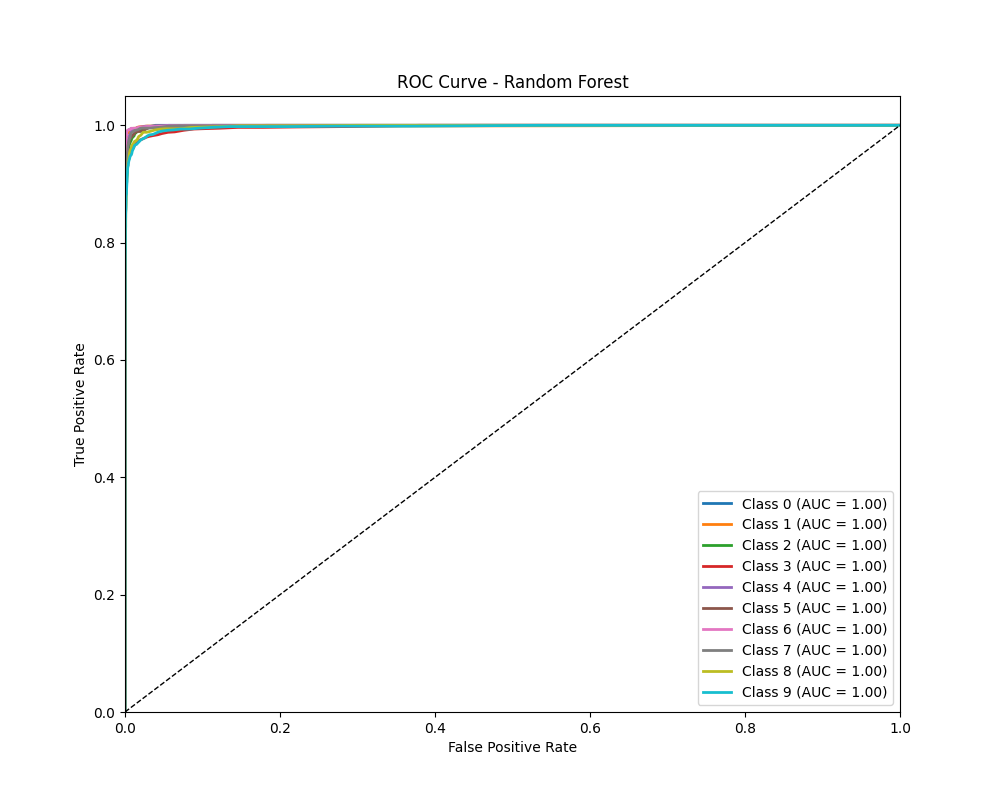

**Step 3: Save Models as Artifacts to WandB**

In [28]:
import joblib
import os
import wandb
os.makedirs("saved_models", exist_ok=True)

# Save classical models
joblib.dump(lr_model, "saved_models/lr_model.pkl")
joblib.dump(knn_model, "saved_models/knn_model.pkl")
joblib.dump(rf_model, "saved_models/rf_model.pkl")

# Save CNN model
cnn_model.save("saved_models/cnn_model.keras")

# Initialize wandb before logging the artifact
wandb.init(project="digitwise-mnist-comparison", name="model-saving") # Initialize a new wandb run

# Create artifacts
artifact = wandb.Artifact("mnist_models", type="model")
artifact.add_dir("saved_models")
wandb.log_artifact(artifact)

wandb.finish()

wandb: Adding directory to artifact (./saved_models)... Done. 2.2s
